### Implementing Perceptron Learning Algorithm
* Learn/ update the weights
* Reduce Bias
* Make the predictions

In [45]:
import numpy as np
from matplotlib import pyplot as plt
# make_blobs create isotropic version blogs for clustering
from sklearn.datasets import make_blobs,make_moons
plt.style.use("seaborn")

/var/folders/cy/hd9k90656lx_zrdft5_wmllh0000gn/T/ipykernel_24853/4029287965.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [46]:
# X : imaginary features , Y: labels 
# Creating a random dataset
# X,Y = make_blobs(n_samples=500,centers=2,n_features=2,random_state=10)
X,Y = make_moons(n_samples=1000,shuffle=True,noise=0.2,random_state=1000)
print(X.shape,Y.shape)

(1000, 2) (1000,)


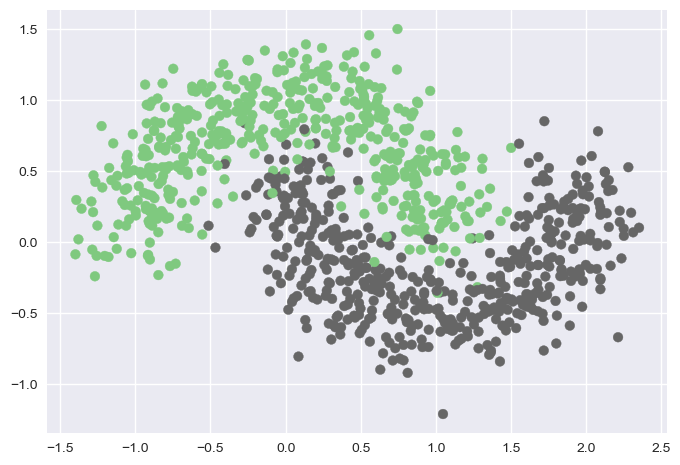

In [47]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

Goal of the Neural Network : To create a decision boundary of form w0 + w1x1 + w2x2 = 0

### Model and Helper Functions

In [48]:
# Defining sigmoid function
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [49]:
sigmoid(5)

0.9933071490757153

In [50]:
# Broadcasting : is a powerful feature in NumPy that allows for element-wise operations between arrays of different shapes and sizes. The
z = np.array([1,2,3,4,5])
sigmoid(z) # returns an array

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

### Log Loss Function
![Log Loss Function](LogLoss.png)

### Update Rule
![Update Rule](UpdateRule1.png)
![Update Rule](UpdateRule2.png)

In [51]:
# x.w returns a matrix of m*1
# weights are taken as an array of dim n*!
def predict(X,weights):
    # X -> m x (n+1) matrix # +1 for the bias term
    # w -> n x 1 vector
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions

def loss(X,Y,weights):
    # Binary Cross Entropy/ Log Likelihood
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_)-(1-Y)*np.log(1-Y_))
    return cost
# del W = (del J/del wj)
#       = (Y_ - Y)* xj
# xj -> m X n we take transpose of x
# Y_ : Probability
# Y : 0,1
def update(X,Y,weights,learning_rate):
    # Define the update rule for one particular epoch
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_ - Y)
    
    m = X.shape[0]
    weights = weights - learning_rate *dw/(float(m))
    return weights

# we add a bias term (x0)
def train(X,Y,learning_rate,maxEpochs=100):
    # Take care of the bias term
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    # Initialize the weights
    # we have taken X.shape[1] because now x has n+1 entries
    weights = np.zeros(X.shape[1]) 
    
    # Iterate and use the update function
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        # Update after every 10 epoch
        if epoch%10 == 0:
            l = loss(X,Y,weights)
            print("Epoch Number %d Loss %.4f"%(epoch,l))
            
    return weights

In [52]:
weights = train(X,Y,learning_rate=0.01,maxEpochs=500)

Epoch Number 0 Loss 0.6922
Epoch Number 10 Loss 0.6825
Epoch Number 20 Loss 0.6732
Epoch Number 30 Loss 0.6643
Epoch Number 40 Loss 0.6557
Epoch Number 50 Loss 0.6475
Epoch Number 60 Loss 0.6396
Epoch Number 70 Loss 0.6320
Epoch Number 80 Loss 0.6247
Epoch Number 90 Loss 0.6177
Epoch Number 100 Loss 0.6109
Epoch Number 110 Loss 0.6044
Epoch Number 120 Loss 0.5981
Epoch Number 130 Loss 0.5921
Epoch Number 140 Loss 0.5863
Epoch Number 150 Loss 0.5806
Epoch Number 160 Loss 0.5752
Epoch Number 170 Loss 0.5699
Epoch Number 180 Loss 0.5649
Epoch Number 190 Loss 0.5600
Epoch Number 200 Loss 0.5552
Epoch Number 210 Loss 0.5506
Epoch Number 220 Loss 0.5462
Epoch Number 230 Loss 0.5419
Epoch Number 240 Loss 0.5377
Epoch Number 250 Loss 0.5337
Epoch Number 260 Loss 0.5298
Epoch Number 270 Loss 0.5260
Epoch Number 280 Loss 0.5223
Epoch Number 290 Loss 0.5187
Epoch Number 300 Loss 0.5152
Epoch Number 310 Loss 0.5119
Epoch Number 320 Loss 0.5086
Epoch Number 330 Loss 0.5054
Epoch Number 340 Loss 0.5

### Visualization and Predictions

In [53]:
def get_preds(X_test,weights,labels=True):
    # It is possible that test data may not have bias term
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones(X_test.shape[0],1)
        X_test = np.hstack(ones,X_test)
        
    probs = predict(X_test,weights)
    
    if not labels:
        return probs
    else:
        # Labels will be of same shape as probability (probs)
        labels = np.zeros(probs)
        # If probability > = 0.5 move it to label 1 else label 0 
        # Through Broadcasting
        labels[probs>=0.5] = 1
        return labels   

In [54]:
# Plotting the decision boundary
# Equation of decision boundary : w0 + w1x1 + w2x2 = 0
# x2 = - (w0 + w1x1) / w2

In [55]:
weights

array([-0.08359373,  0.70898417, -0.75857775])

In [60]:
x1 = np.linspace(-2,2,10)
print(x1)
x2 = -(weights[0] + weights[1]*x1) / weights[2]
print(x2)

[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]
[-1.97944388 -1.5640559  -1.14866792 -0.73327994 -0.31789196  0.09749602
  0.51288399  0.92827197  1.34365995  1.75904793]


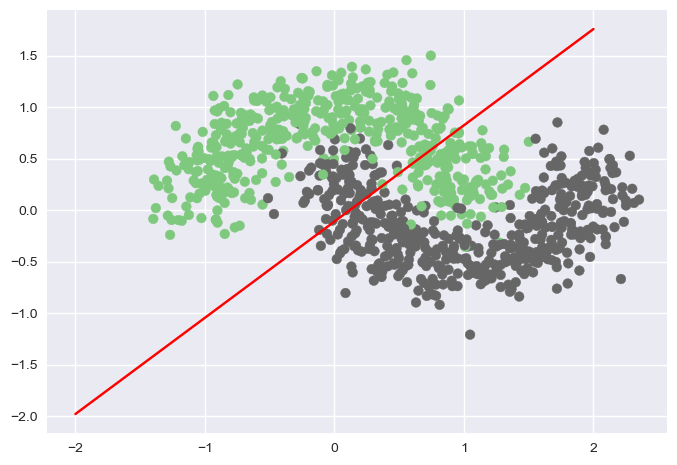

In [61]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c='red')
plt.show()
# The Best fit line that could be obtained using the data

### Drawback of a Single Layer Neural Network
* A single layer perceptron can only learn linear functions
* The Boolean function XOR is not linearly separable (Its positive and negative instances cannot be separated by a line or hyperplane). Hence a single layer perceptron can never compute the XOR function. This is a big drawback that once resulted in the stagnation of the field of neural networks